In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE

### learning curve

In [13]:
path_string = 'results/avg_acc.seqs'
with open(path_string,'rb') as f:
    avg_acc = pickle.load(f)
    
path_string = 'results/avg_auc.seqs'
with open(path_string,'rb') as f:
    avg_auc = pickle.load(f)
    
path_string = 'results/avg_loss.seqs'
with open(path_string,'rb') as f:
    avg_loss = pickle.load(f)
    
path_string = 'results/test_acc.seqs'
with open(path_string,'rb') as f:
    test_acc = pickle.load(f)
    
path_string = 'results/test_auc.seqs'
with open(path_string,'rb') as f:
    test_auc = pickle.load(f)


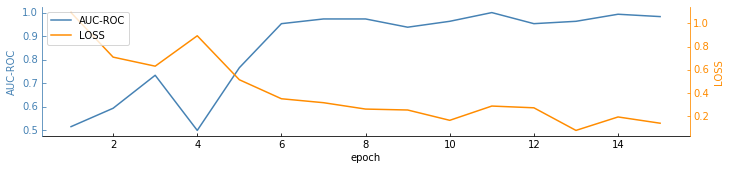

In [8]:
plt.figure(figsize=(10,2))
fig = plt.figure(1) 
ax_cof = HostAxes(fig, [0, 0, 0.9, 0.9])  

#parasite addtional axes, share x
ax_temp = ParasiteAxes(ax_cof, sharex=ax_cof)
#append axes
ax_cof.parasites.append(ax_temp)
#invisible right axis of ax_cof
ax_cof.axis['right'].set_visible(False)
ax_cof.axis['top'].set_visible(False)
ax_temp.axis['right'].set_visible(True)
ax_temp.axis['right'].major_ticklabels.set_visible(True)
ax_temp.axis['right'].label.set_visible(True)

#set label for axis
ax_cof.set_ylabel('AUC-ROC')
ax_cof.set_xlabel('epoch')
ax_temp.set_ylabel('LOSS')
fig.add_axes(ax_cof)

''' #set limit of x, y
ax_cof.set_xlim(0,2)
ax_cof.set_ylim(0,3)
'''
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
curve_cof = ax_cof.plot(x, avg_auc, label="AUC-ROC", color='steelblue')
curve_temp = ax_temp.plot(x, avg_loss, label="LOSS", color='darkorange')

#ax_temp.set_ylim(0,2)
ax_cof.legend()

ax_cof.axis['left'].label.set_color('steelblue')
ax_temp.axis['right'].label.set_color('darkorange')

ax_cof.axis['left'].major_ticks.set_color('steelblue')
ax_temp.axis['right'].major_ticks.set_color('darkorange')

ax_cof.axis['left'].major_ticklabels.set_color('steelblue')
ax_temp.axis['right'].major_ticklabels.set_color('darkorange')

ax_cof.axis['left'].line.set_color('steelblue')
ax_temp.axis['right'].line.set_color('darkorange')


plt.show()

### embedding PCA clustering

In [70]:
# states from all state in sequence of batch data 
# survival states from all state in sequence. the order is time 0 to onset
# dead states from all state in sequence. 

In [14]:
path_string = 'emb/states.seqs'
with open(path_string,'rb') as f:
    states = pickle.load(f)

In [15]:
path_string = 'emb/SurvivalStates.seqs'
with open(path_string,'rb') as f:
    survival = pickle.load(f)

In [16]:
path_string = 'emb/DeadStates.seqs'
with open(path_string,'rb') as f:
    dead = pickle.load(f)

In [18]:
#all 327; survival 264; dead 63
#label survival0 dead1
emb=[]
emb_label=[] # survival dead
emb_stage=[] # statge
for i in range (len(survival)):
    for j in range(len(survival[i])):
        emb.append(survival[i][j])
        emb_label.append(0)
        emb_stage.append(i)
for i in range (len(dead)):
    for j in range(len(dead[i])):
        emb.append(dead[i][j])
        emb_label.append(1)
        emb_stage.append(i+6)

#### PCA

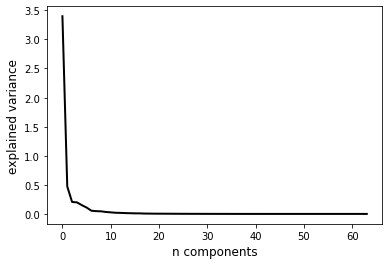

In [37]:
# components analysis
pca = PCA()
pca.fit(emb)
plt.figure()
plt.plot(pca.explained_variance_, 'k', linewidth=2)
plt.xlabel('n components', fontsize=12)
plt.ylabel('explained variance', fontsize=12)
plt.show()

In [100]:
pca = PCA(n_components = 2)
projected = pca.fit_transform(emb) 

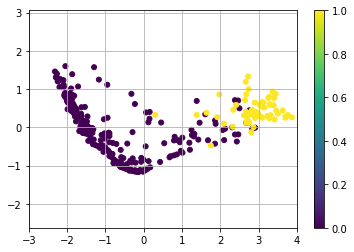

In [101]:
# dead (yellow) vs. sirvival (violet)
plt.scatter(projected[:,0],projected[:,1],c = emb_label,s=25)
plt.axis('equal')
plt.grid()
plt.colorbar()
ax = plt.gca().set_xlim(-3,4)
plt.savefig('scatter.jpg', dpi=300)

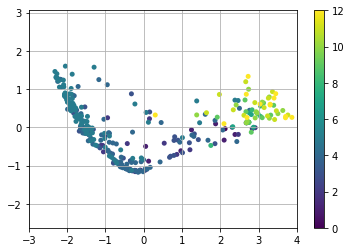

In [102]:
plt.scatter(projected[:,0],projected[:,1],c = emb_stage,edgecolor='none',alpha=1,s=25)
plt.axis('equal')
plt.grid()
plt.colorbar()
ax = plt.gca().set_xlim(-3,4)

In [103]:
survivalPro=np.array(projected.tolist()[:264])
deadPro=np.array(projected[264:])
survival_stage=emb_stage[:264]
dead_stage=emb_stage[264:]
for i in range(len(dead_stage)):
    dead_stage[i]=dead_stage[i]-6

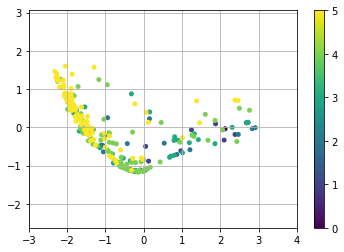

In [104]:
plt.scatter(survivalPro[:,0],survivalPro[:,1],c = survival_stage,edgecolor='none',alpha=1,s=25)
plt.axis('equal')
plt.grid()
plt.colorbar()
ax = plt.gca().set_xlim(-3,4)
plt.savefig('scattersurvival.jpg', dpi=300)

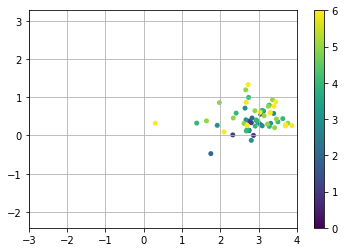

In [105]:
plt.scatter(deadPro[:,0],deadPro[:,1],c = dead_stage,edgecolor='none',alpha=1,s=25)
plt.axis('equal')
plt.grid()
plt.colorbar()
ax = plt.gca().set_xlim(-3,4)
plt.savefig('scatterdead.jpg', dpi=300)

#### TSNE

In [19]:
tsne = TSNE(n_components = 2)
projected=tsne.fit_transform(emb)

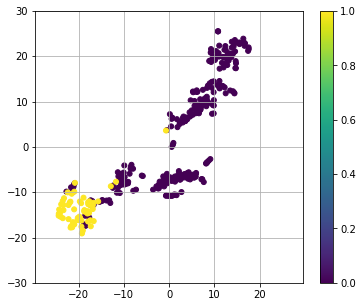

In [153]:
# dead (yellow) vs. sirvival (violet)
plt.figure(figsize=(6,5))
plt.scatter(projected[:,0],projected[:,1],c = emb_label,s=25)
plt.axis('equal')
plt.grid()
plt.colorbar()
plt.gca().set_ylim(-30,30)
plt.gca().set_xlim(-30,30)
plt.savefig('scatter.jpg', dpi=300)

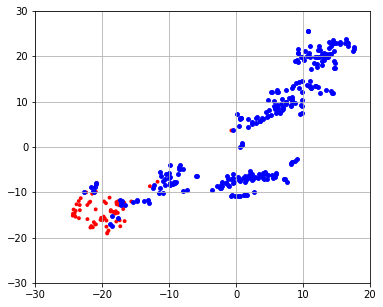

In [155]:
plt.figure(figsize=(6,5))
plt.scatter(deadPro[:,0],deadPro[:,1],c = 'red',edgecolor='none',alpha=1,s=15)
plt.scatter(survivalPro[:,0],survivalPro[:,1],c = 'blue',alpha=1,s=15)
plt.grid()
plt.gca().set_ylim(-30,30)
plt.gca().set_xlim(-30,20)
plt.savefig('scatter.jpg', dpi=300)

In [23]:
survivalPro=np.array(projected.tolist()[:264])
deadPro=np.array(projected[264:])
survival_stage=emb_stage[:264]
dead_stage=emb_stage[264:]
for i in range(len(dead_stage)):
    dead_stage[i]=dead_stage[i]-6

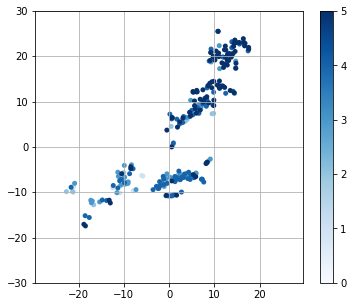

In [157]:
plt.figure(figsize=(6,5))
plt.scatter(survivalPro[:,0],survivalPro[:,1],c = survival_stage,edgecolor='none',alpha=1,s=25,cmap='Blues')
plt.axis('equal')
plt.grid()
plt.colorbar()
plt.gca().set_ylim(-30,30)
plt.gca().set_xlim(-30,30)
plt.savefig('scattersurvival.jpg', dpi=300)

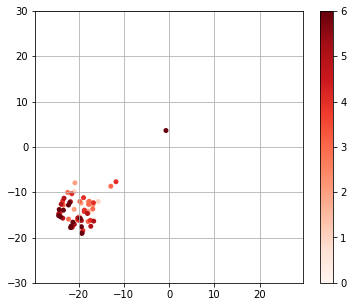

In [190]:
plt.figure(figsize=(6,5))
plt.scatter(deadPro[:,0],deadPro[:,1],c = dead_stage,edgecolor='none',alpha=1,s=25,cmap='Reds')
plt.axis('equal')
plt.grid()
plt.gca().set_ylim(-30,30)
plt.gca().set_xlim(-30,30)
plt.savefig('scatterdead.jpg', dpi=300)

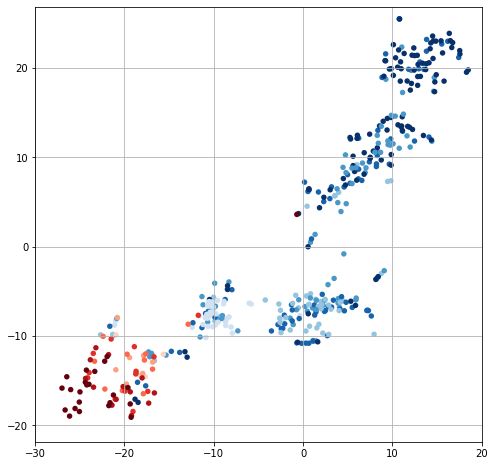

In [308]:
plt.figure(figsize=(8,8))
plt.scatter(survivalPro[:,0],survivalPro[:,1],c = survival_stage,edgecolor='none',alpha=1,s=30,cmap='Blues')
plt.scatter(deadPro[:,0],deadPro[:,1],c = dead_stage,edgecolor='none',alpha=1,s=30,cmap='Reds')
plt.axis('equal')
plt.grid()
plt.gca().set_ylim(-25,30)
plt.gca().set_xlim(-30,20)
plt.savefig('scatter.jpg', dpi=300)

In [212]:
import random

In [278]:
for i in range(10):
    a=np.array([[random.uniform(-27,-24),random.uniform(-19,-14)]])
    deadPro=np.concatenate((deadPro,a),axis=0)
    dead_stage.append(6)


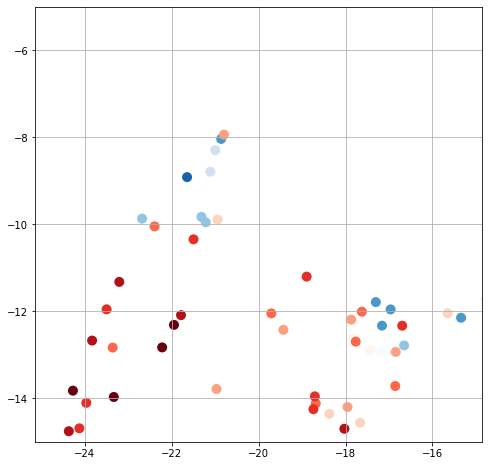

In [195]:
plt.figure(figsize=(8,8))
plt.scatter(survivalPro[:,0],survivalPro[:,1],c = survival_stage,edgecolor='none',alpha=1,s=100,cmap='Blues')
plt.scatter(deadPro[:,0],deadPro[:,1],c = dead_stage,edgecolor='none',alpha=1,s=100,cmap='Reds')
plt.axis('equal')
plt.grid()
plt.gca().set_ylim(-15,-5)
plt.gca().set_xlim(-25,-15)
plt.savefig('scatterZoonin.jpg', dpi=300)

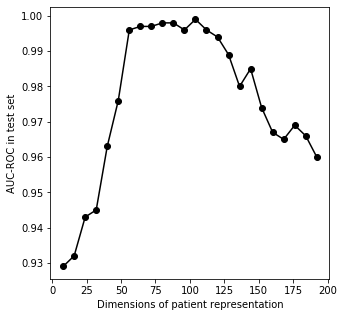

In [29]:
x=[i*8+8 for i in range(24)]
y=[0.929,0.932,0.943,0.945,0.963,0.976,0.996,0.997,0.997,0.998,0.998,0.996,0.999,0.996,0.994,0.989,0.980,0.985,0.974,0.967,0.965,0.969,0.966,0.960]
plt.figure(figsize=(5,5))
plt.plot(x,y,c='black',marker='o')
plt.xlabel('Dimensions of patient representation')
plt.ylabel('AUC-ROC in test set')
#plt.gca().set_ylim(0,1)
plt.savefig('AUC-ROC_dimension.jpg', dpi=300)

In [98]:
tsne = TSNE(n_components = 2)
projected=tsne.fit_transform(emb)

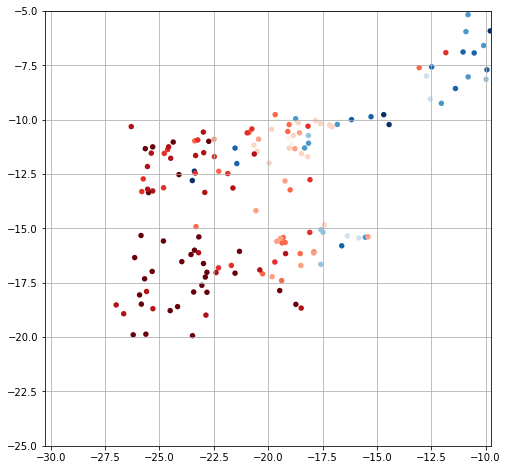

In [127]:
plt.figure(figsize=(8,8))
plt.scatter(survivalPro[:,0],survivalPro[:,1],c = survival_stage,edgecolor='none',alpha=1,s=30,cmap='Blues')
plt.scatter(deadPro[:,0],deadPro[:,1],c = dead_stage,edgecolor='none',alpha=1,s=30,cmap='Reds')
plt.axis('equal')
plt.grid()
plt.gca().set_ylim(-25,-5)
plt.gca().set_xlim(-30,-10)
plt.savefig('scatter.jpg', dpi=300)

In [126]:
import random
for i in range(5):
    a=np.array([[random.uniform(-20,-17.5),random.uniform(-17.5,-15)]])
    deadPro=np.concatenate((deadPro,a),axis=0)
    dead_stage.append(2)

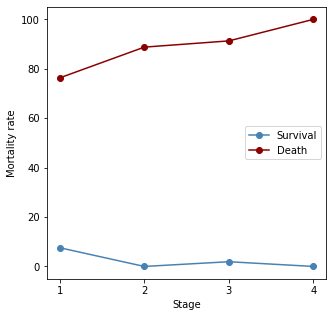

In [133]:
x=[1,2,3,4]
y1=[7.57,0,1.91,0]
y2=[76.32,88.76,91.28,100]
plt.figure(figsize=(5,5))
plt.plot(x,y1,c='steelblue',marker='o',label='Survival')
plt.plot(x,y2,c='darkred',marker='o',label='Death')
plt.xlabel('Stage')
plt.ylabel('Mortality rate')
plt.legend(loc='right')

plt.xticks(x)
plt.savefig('MR.jpg', dpi=300)

#### clustering

In [41]:
from sklearn.cluster import KMeans
import sklearn.metrics as metrics

In [40]:
clst = cluster.DBSCAN();
labels = clst.fit_predict(survivalPro)
metrics.calinski_harabaz_score(survivalPro, labels) 

/Users/sunchenxi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


2.010378308997999

In [54]:
epsilons = np.logspace(0,1.5)
CH=[]
for epsilon in epsilons:
        clst = cluster.DBSCAN(eps=epsilon)
        predicted_labels = clst.fit_predict(survivalPro)
        ch=metrics.calinski_harabaz_score(survivalPro, predicted_labels) 
        CH.append(ch)
        #Core_nums.append(len(clst.core_sample_indices_))

/Users/sunchenxi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sunchenxi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sunchenxi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sunchenxi/opt/a

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [70]:
CH

[22.015658708667235,
 33.65919811944284,
 53.19757677052365,
 78.15681635071319,
 111.06304282703677,
 142.140745468096,
 194.72397324219637,
 233.97440811520843,
 252.56042009730626,
 251.52914916739948,
 254.19047935014925,
 286.5898578218178,
 316.605185043045,
 316.75419905568396,
 317.263632022336,
 317.263632022336,
 238.4127998233204,
 326.5844587482989,
 334.1264495294623,
 432.4667096002464,
 390.6114322391913,
 680.073853982927,
 680.073853982927,
 680.073853982927,
 680.073853982927,
 680.073853982927]

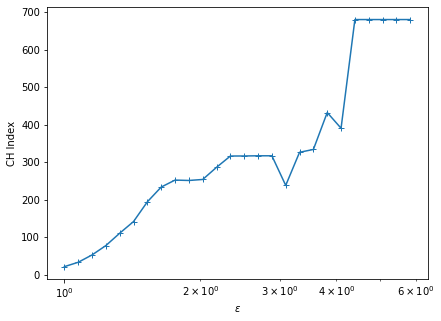

In [69]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
ax.plot(epsilons,CH,marker = '+')
ax.set_xscale('log')
ax.set_xlabel(r"$\epsilon$")
ax.set_ylabel('CH Index')
plt.savefig('CH.jpg', dpi=300)

In [81]:
epsilons = np.logspace(0,1.5)
CH=[]
for epsilon in epsilons:
        clst = cluster.DBSCAN(eps=epsilon)
        predicted_labels = clst.fit_predict(deadPro)
        ch=metrics.calinski_harabaz_score(deadPro, predicted_labels) 
        CH.append(ch)

/Users/sunchenxi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sunchenxi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sunchenxi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sunchenxi/opt/a

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [89]:
CH

[4.990300328297867,
 6.121544671744346,
 6.981481061627022,
 7.705368268400847,
 12.589591443802538,
 13.515180022709794,
 20.17390966836235,
 20.49201257640605,
 40.704396702146724,
 40.704396702146724,
 40.704396702146724,
 44.23090352744576,
 44.23090352744576,
 44.23090352744576,
 44.23090352744576,
 44.23090352744576,
 43.616474629113675,
 43.616474629113675,
 43.616474629113675,
 43.616474629113675,
 41.46224896032986,
 41.46224896032986,
 41.46224896032986,
 43.29231928273235,
 43.29231928273235,
 43.29231928273235,
 43.29231928273235,
 43.29231928273235,
 43.29231928273235,
 43.29231928273235,
 43.29231928273235,
 43.29231928273235,
 43.29231928273235,
 43.29231928273235,
 43.29231928273235,
 43.29231928273235,
 43.29231928273235,
 43.29231928273235,
 43.29231928273235,
 43.29231928273235]

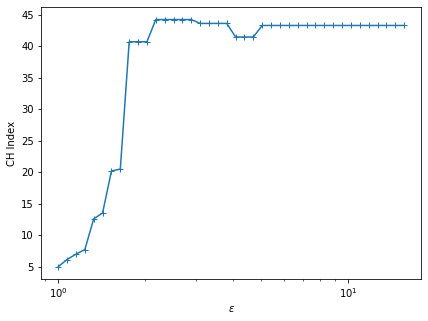

In [88]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
ax.plot(epsilons,CH,marker = '+')
ax.set_xscale('log')
ax.set_xlabel(r"$\epsilon$")
ax.set_ylabel('CH Index')
plt.savefig('CH2.jpg', dpi=300)

In [33]:
kmeans_model = KMeans(n_clusters=4, random_state=1).fit(survivalPro)
labels = kmeans_model.labels_
metrics.calinski_harabaz_score(survivalPro, labels) 

/Users/sunchenxi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


1073.4562858265995

In [1]:
from sklearn import cluster
from sklearn.metrics import adjusted_rand_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture

In [2]:
def create_data(centers,num=100,std=0.7):
    X,labels_true = make_blobs(n_samples=num,centers=centers, cluster_std=std)
    return X,labels_true

In [3]:
def plot_data(*data):
    X,labels_true=data
    labels=np.unique(labels_true)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    colors='rgbycm'
    for i,label in enumerate(labels):
        position=labels_true==label
        ax.scatter(X[position,0],X[position,1],label="cluster %d"%label),
        color=colors[i%len(colors)]

    ax.legend(loc="best",framealpha=0.5)
    ax.set_xlabel("X[0]")
    ax.set_ylabel("Y[1]")
    ax.set_title("data")
    plt.show()

In [4]:
def test_DBSCAN(*data):
    X,labels_true = data
    clst = cluster.DBSCAN();
    predict_labels = clst.fit_predict(X)
    print("ARI:%s"%adjusted_rand_score(labels_true,predict_labels))
    print("Core sample num:%d"%len(clst.core_sample_indices_))

In [5]:
def test_DBSCAN_epsilon(*data):
    X,labels_true = data
    epsilons = np.logspace(-1,1.5)
    ARIs=[]
    Core_nums = []
    for epsilon in epsilons:
        clst = cluster.DBSCAN(eps=epsilon)
        predicted_labels = clst.fit_predict(X)
        ARIs.append(adjusted_rand_score(labels_true,predicted_labels))
        Core_nums.append(len(clst.core_sample_indices_))

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(1,2,1)
    ax.plot(epsilons,ARIs,marker = '+')
    ax.set_xscale('log')
    ax.set_xlabel(r"$\epsilon$")
    ax.set_ylim(0,1)
    ax.set_ylabel('ARI')

    ax = fig.add_subplot(1,2,2)
    ax.plot(epsilons,Core_nums,marker='o')
    ax.set_xsca

    fig.suptitle("DBSCAN")
    plt.show()

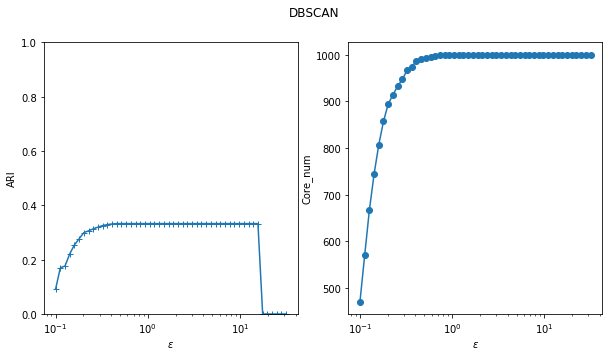

In [6]:
centers = [[1,1],[1,2],[2,2],[10,20]]
X,labels_true = create_data(centers,1000,0.5)
test_DBSCAN_epsilon(X,labels_true)

In [ ]:
metrics.calinski_harabaz_score(X, labels) 